# Van der Pol oscillator
*Matthias König*

The Van der Pol oscillator is a non-conservative oscillator with non-linear damping. It is one of the standard models analysed in dynamics. In this tutorial the Van der Pol oscillator is analysed using SBML.

http://en.wikipedia.org/wiki/Van_der_Pol_oscillator  
http://www.opencor.ws/user/howToGetStarted.html

## History
The Van der Pol oscillator was originally proposed by the Dutch electrical engineer and physicist Balthasar van der Pol while he was working at Philips. Van der Pol found stable oscillations, which he called relaxation-oscillations[2] and are now known as limit cycles, in electrical circuits employing vacuum tubes. When these circuits were driven near the limit cycle they become entrained, i.e. the driving signal pulls the current along with it. Van der Pol and his colleague, van der Mark, reported in the September 1927 issue of Nature that at certain drive frequencies an irregular noise was heard. This irregular noise was always heard near the natural entrainment frequencies. This was one of the first discovered instances of deterministic chaos.

The Van der Pol equation has a long history of being used in both the physical and biological sciences. For instance, in biology, Fitzhugh and Nagumo extended the equation in a planar field as a model for action potentials of neurons. 

## Equations
The Van der Pol oscillator evolves in time according to the second-order differential equation

$$\frac{d^2x}{dt^2} - µ(1-x^2)\frac{dx}{dt} + x = 0$$

with initial conditions $x=−2$ and $\frac{dx}{dt}=0$. $x$ is the position coordinate—which is a function of the time $t$, and $μ$ is a scalar parameter indicating the nonlinearity and the strength of the damping.

To create a SBML file, we need to convert the second-order equation to two first-order equations by defining the velocity $\frac{dx}{dt}$ as a new variable $y$:

$$\frac{dx}{dt}=y$$
$$\frac{dy}{dt}=\mu(1-x^2)y-x$$

The initial conditions are now $x=−2$ and $y=0$.

## Requirements
* `antimony`
* `roadrunner`
* `matplotlib`

## Notebook settings
In a first step general settings for the notebook are defined.

In [32]:
from __future__ import print_function, division
# print settings for notebook 
%matplotlib inline

import matplotlib
matplotlib.rcParams;  # available global parameters

matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)
matplotlib.rcParams['axes.labelsize'] = 'medium'
font = {'family' : 'sans-serif',
        'weight' : 'normal', # bold
        'size'   : 14}
matplotlib.rc('font', **font)

## SBML Model
Now the model description of the Van der Pol oscillator in a standard format for computational models, the Systems Biology Markup Language ([SBML](www.sbml.org)) is created [Hucka2003]. This allows to analyse the model in a multitude of tools supporting SBML, to name a few

* `COPASI`
* `cy3sbml`

The SBML for the above system of ordinary differential equations (ODEs) is created with [Antimony](http://antimony.sourceforge.net/): A modular human-readable, human-writeable model definition language [Smith?].

We set the initial conditions $x=−2$ and $y=0$ and the damping parameter $mu=0$, i.e. no dampening.

In [19]:
# create SBML
import antimony

model_id = 'van_der_pol'
# ----------------------------
model_str = '''
model {}
  
var species x = 2; 
var species y = 0;
const mu = 0;

J1: -> x; y
J2: -> y; mu *(1-x^2)*y - x

end
'''.format(model_id)
# ----------------------------

antimony.setBareNumbersAreDimensionless(True)
antimony.loadAntimonyString(model_str)
model_file = '../models/{}.xml'.format(model_id)
antimony.writeSBMLFile(model_file, model_id)
print(model_file)

../models/van_der_pol.xml


In [20]:
# show SBML
print(antimony.getSBMLString(model_id))

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.8.1 on 2016-01-14 15:13 with libSBML version 5.12.1. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model id="van_der_pol" name="van_der_pol">
    <listOfUnitDefinitions>
      <unitDefinition id="dimensionless_litre">
        <listOfUnits>
          <unit kind="dimensionless" exponent="1" scale="0" multiplier="1"/>
          <unit kind="litre" exponent="1" scale="0" multiplier="1"/>
        </listOfUnits>
      </unitDefinition>
    </listOfUnitDefinitions>
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="x" compartment="default_compartment" initialConcentration="2" substanceUnits="dimensionless_litre" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="y" compartment="de

### Validation
Validation of the SBML model and display of problems with the file.

In [30]:
import multiscale.sbmlutils.validation as validation
reload(validation)
validation.validate_sbml(model_file, ucheck=False); # no unit checks

 filename : ../models/van_der_pol.xml
 file size (byte) : 2856
 read time (ms) : 0.864029
 c-check time (ms) : 0.310183
 validation error(s) : 0
 consistency error(s): 0
 validation warning(s) : 0
 consistency warning(s): 0 



## Simulation

After the model definition the model can be be simulated.
We can now use the defined model for some simulations. We use `roadrunner` for the simulations.

In [31]:
import roadrunner
import multiscale.odesim.simulate.roadrunner_tools as rt
reload(rt)
# load model in roadrunner
r = roadrunner.RoadRunner(model_file)
# what are the current selections
print(r.selections)
# make the integrator settings
rt.set_integrator_settings(r)

['time', '[x]', '[y]']
--------------------------------------------------------------------------------
<roadrunner.RoadRunner() { 
'this' : 0x3d4aae0
'modelLoaded' : true
'modelName' : van_der_pol
'libSBMLVersion' : LibSBML Version: 5.11.0
'jacobianStepSize' : 1e-05
'conservedMoietyAnalysis' : false
'simulateOptions' : 
< roadrunner.SimulateOptions() 
{ 
'this' : 0x439e4a0, 
'reset' : 0,
'structuredResult' : 0,
'copyResult' : 1,
'steps' : 50,
'start' : 0,
'duration' : 5
}>, 
'integrator' : 
< roadrunner.Integrator() >
  settings:
      relative_tolerance: 0.00000001
      absolute_tolerance: 0.00000001
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order: 12
       maximum_num_steps: 20000
       maximum_time_step: 0
       minimum_time_step: 0
       initial_time_step: 0
          multiple_steps: false
      variable_step_size: true

}>
--------------------------------------------------------------------------------


mu = 0.0


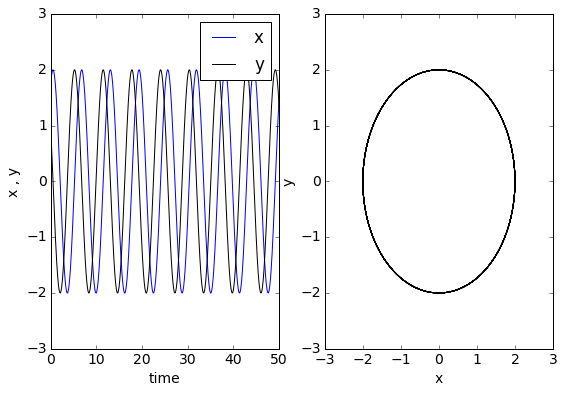

In [35]:
# Simulation 
print('mu = {}'.format(r['mu']))
tend = 50
s = r.simulate(0, tend)

# create plot
import matplotlib.pylab as plt
plt.subplot(121)
plt.plot(s['time'], s['[x]'], color='blue', label='x')
plt.plot(s['time'], s['[y]'], color='black', label='y')
plt.legend()
plt.xlabel('time')
plt.ylabel('x , y');
plt.xlim([0,tend])
plt.ylim([-3,3])

plt.subplot(122)
plt.plot(s['[x]'], s['[y]'], color="black")
plt.xlabel('x')
plt.ylabel('y');
plt.xlim([-3,3])
plt.ylim([-3,3]);

## Model behavior

Evolution of the limit cycle in the phase plane. The limit cycle begins as circle and, with varying $\mu$, become increasingly sharp. An example of a [Relaxation oscillator](http://en.wikipedia.org/wiki/Relaxation_oscillator).

The Van der Pol oscillator shows an interesting behavior depending on the dampin parameter $\mu$.

![phase plane](http://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/VanderPol-lc.svg/220px-VanderPol-lc.svg.png "Van der Pol phase plane")

In [39]:
# add the additional values of interest to the selection
print(r.selections)
r.selections = ['time'] + ['[{}]'.format(sid) for sid in r.model.getFloatingSpeciesIds()] \
                            + r.model.getReactionIds()
print(r.selections)

['time', '[x]', '[y]', 'J1', 'J2']
['time', '[x]', '[y]', 'J1', 'J2']


In [42]:
# change the control parameter mu in the model
import numpy as np
results = []
mu_values = [0, 0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
for mu in mu_values:
    print(mu)
    s, gp = rt.simulate(r, t_start=0, t_stop=100, parameters={'mu': mu})
    results.append(s)

0
Integration time: 0.0126299858093
0.01
Integration time: 0.0153958797455
0.5
Integration time: 0.0330009460449
1.0
Integration time: 0.0435178279877
1.5
Integration time: 0.0480110645294
2.0
Integration time: 0.0527539253235
2.5
Integration time: 0.0533149242401
3.0
Integration time: 0.0570800304413
3.5
Integration time: 0.0560970306396
4.0
Integration time: 0.0545349121094


(-7, 7)

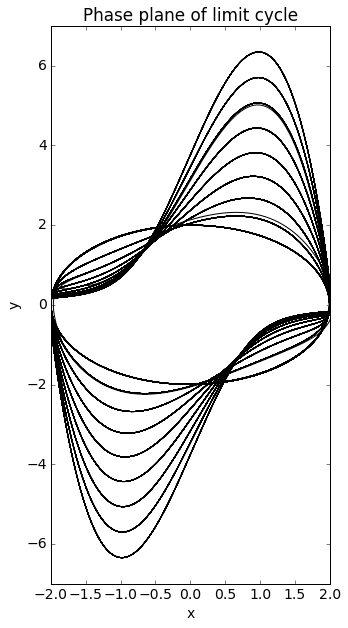

In [46]:
plt.figure(figsize=(5,10))
for k, mu in enumerate(mu_values):
    res = results[k]
    plt.plot(res['[x]'], res['[y]'], color='black')
plt.title('Phase plane of limit cycle')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-2,2])
plt.ylim([-7,7])

In [47]:
# calculating the derivatives for given concentrations
def dxdt(rr, X, Y): 
    DX = np.zeros_like(X)
    DY = np.zeros_like(Y)
    for k, _ in np.ndenumerate(X):
        # print('X[k], Y[k]', X[k], Y[k])
        rr['[x]'], rr['[y]'] = X[k], Y[k] 
        DX[k], DY[k] = rr['J1'], rr['J2']
    return DX, DY

In [60]:
def phase_portrait(r, x=np.linspace(-6, 6, 20), y=np.linspace(-8, 8, 20), figsize = (5,8)):
    
    fig2 = plt.figure(figsize=figsize)
    ax2 = fig2.add_subplot(1,1,1)

    # quiverplot
    # define a grid and compute direction at each point
    X1 , Y1  = np.meshgrid(x, y)                    # create a grid
    DX1, DY1 = dxdt(r, X1, Y1)                   # compute J1 and J2 (use roadrunner as calculator)

    M = (np.hypot(DX1, DY1))                        # norm the rate 
    M[ M == 0] = 1.                                 # avoid zero division errors 
    DX1 /= M                                        # normalize each arrows
    DY1 /= M

    ax2.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
    # ax2.xaxis.label = 'x'
    # ax2.yaxis.label = 'y'
    # ax2.legend()
    ax2.grid()

In [61]:
# single trajectories
def trajectory(mu, x0=2.0, y0=0.0, color="black"):
    s, _ = rt.simulate(r, t_start=0, t_stop=100, 
                       parameters = {'mu' : mu}, init_concentrations={'x':x0, 'y':y0})
    plt.plot(s['[x]'], s['[y]'], color=color)

0.3
Integration time: 0.0302059650421
0.0
Integration time: 0.015811920166
0.3
Integration time: 0.0302400588989
4.0
Integration time: 0.0515151023865


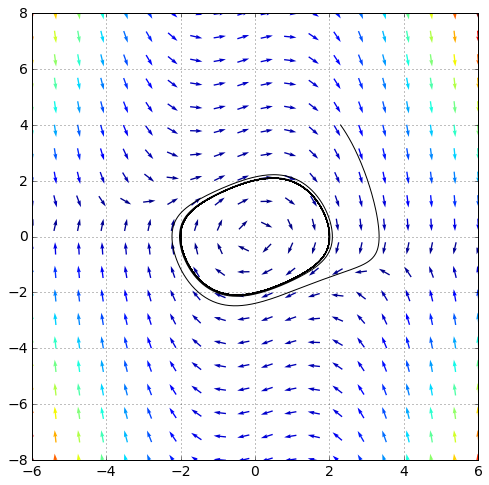

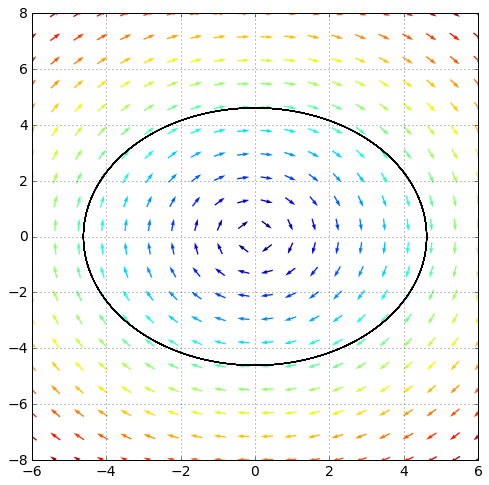

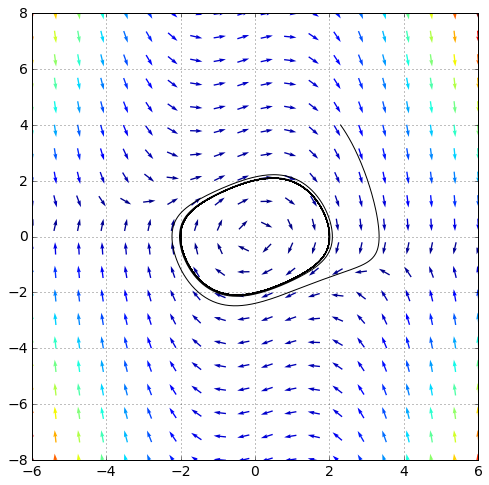

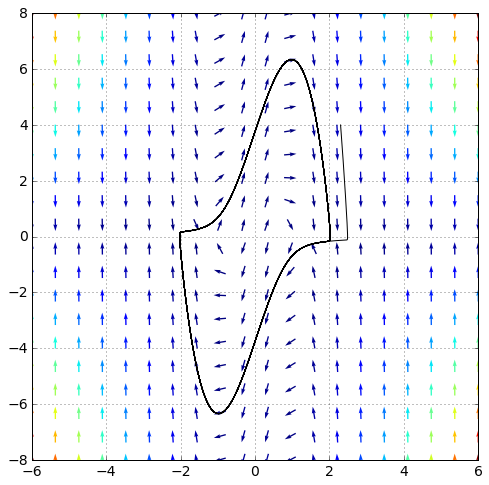

In [62]:
for mu in [0.3, 0.0, 0.3, 4.0]:
    print(mu)
    r['mu'] = mu
    phase_portrait(r, figsize=(8,8))
    trajectory(mu, x0=2.3, y0=4.0)

## Phase plane and trajectories

We can now analyse the phase plane and the trajectories for different damping values $mu$.

In [ ]:
mu = 0.3  # 0.0, 0.3, 4.0

# create phase portrait
rr['mu'] = mu
phase_portrait(rr)



trajectory(mu, x0=2.3, y0=4.0)
trajectory(mu, x0=0.2, y0=0.4)
trajectory(mu, x0=-2.0, y0=6.0)
trajectory(mu, x0=-2.0, y0=-6.0)
# limit cycle
trajectory(mu, color="blue")